In [14]:
try:
    import psycopg2 
except:
    !pip install psycopg2-binary 
    import psycopg2
    
try:
    from sqlalchemy import create_engine
except:
    !pip install sqlalchemy
    from sqlalchemy import create_engine
    
    
try:
    import pandas as pd 
except:
    !pip install pandas
    import pandas as pd 
     
try:
    import matplotlib 
except:
    !pip install matplotlib
    import matplotlib

try:
    import sklearn 
except:
    !pip install sklearn
    import sklearn

In [28]:
List_of_days=[]
for year in range(2021,2022):
  for month in range(1,13):
    for day in range(1,32):
      month=int(month)
      if day <=9:
        day=f'0{day}'

      if month <= 9 :
        month=f'0{month}'
      List_of_days.append(f'{month}-{day}-{year}')

In [29]:
# Check this list 
List_of_days[0:10]

['01-01-2021',
 '01-02-2021',
 '01-03-2021',
 '01-04-2021',
 '01-05-2021',
 '01-06-2021',
 '01-07-2021',
 '01-08-2021',
 '01-09-2021',
 '01-10-2021']

In [30]:
Day='01-01-2022'

def Get_DF_i(Day):
    DF_i=None
    try: 
        URL_Day=f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{Day}.csv'
        DF_day=pd.read_csv(URL_Day)
        DF_day['Day']=Day
        cond=(DF_day.Country_Region=='United Kingdom')
        Selec_columns=['Day','Country_Region', 'Last_Update',
              'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
              'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio']
        DF_i=DF_day[cond][Selec_columns].reset_index(drop=True)
    except:
    #print(f'{Day} is not available!')
        pass
    return DF_i

print(Get_DF_i(Day))

Day='02-31-2022'

print(Get_DF_i(Day))

           Day  Country_Region          Last_Update        Lat      Long_  \
0   01-01-2022  United Kingdom  2022-01-02 04:20:52  18.220600 -63.068600   
1   01-01-2022  United Kingdom  2022-01-02 04:20:52  32.307800 -64.750500   
2   01-01-2022  United Kingdom  2022-01-02 04:20:52  18.420700 -64.640000   
3   01-01-2022  United Kingdom  2022-01-02 04:20:52  19.313300 -81.254600   
4   01-01-2022  United Kingdom  2022-01-02 04:20:52  49.372300  -2.364400   
5   01-01-2022  United Kingdom  2022-01-02 04:20:52  52.355500  -1.174300   
6   01-01-2022  United Kingdom  2022-01-02 04:20:52 -51.796300 -59.523600   
7   01-01-2022  United Kingdom  2022-01-02 04:20:52  36.140800  -5.353600   
8   01-01-2022  United Kingdom  2022-01-02 04:20:52  54.236100  -4.548100   
9   01-01-2022  United Kingdom  2022-01-02 04:20:52  16.742498 -62.187366   
10  01-01-2022  United Kingdom  2022-01-02 04:20:52  54.787700  -6.492300   
11  01-01-2022  United Kingdom  2022-01-02 04:20:52  -7.946700 -14.355900   

In [31]:
import time 

Start=time.time()
DF_all=[]
for Day in List_of_days:
    DF_all.append(Get_DF_i(Day))
End=time.time()
Time_in_sec=round((End-Start)/60,2)
print(f'It took {Time_in_sec} minutes to get all data')

It took 23.17 minutes to get all data


In [32]:
DF_Uk=pd.concat(DF_all).reset_index(drop=True)
# Create DateTime for Last_Update
DF_Uk['Last_Updat']=pd.to_datetime(DF_Uk.Last_Update, infer_datetime_format=True)  
DF_Uk['Day']=pd.to_datetime(DF_Uk.Day, infer_datetime_format=True)  

DF_Uk['Case_Fatality_Ratio']=DF_Uk['Case_Fatality_Ratio'].astype(float)

DF_Uk.head(10)

,Day,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Last_Updat
0,2021-01-01,United Kingdom,2021-01-02 05:22:33,18.220600,-63.068600,13,0,12.0,1.0,"Anguilla, United Kingdom",86.655113,0.000000,2021-01-02 05:22:33
1,2021-01-01,United Kingdom,2021-01-02 05:22:33,32.307800,-64.750500,604,10,445.0,149.0,"Bermuda, United Kingdom",969.922759,1.655629,2021-01-02 05:22:33
2,2021-01-01,United Kingdom,2021-01-02 05:22:33,18.420700,-64.640000,86,1,74.0,11.0,"British Virgin Islands, United Kingdom",284.419751,1.162791,2021-01-02 05:22:33
3,2021-01-01,United Kingdom,2021-01-02 05:22:33,19.313300,-81.254600,338,2,294.0,42.0,"Cayman Islands, United Kingdom",514.303104,0.591716,2021-01-02 05:22:33
4,2021-01-01,United Kingdom,2021-01-02 05:22:33,49.372300,-2.364400,0,0,2445.0,554.0,"Channel Islands, United Kingdom",1794.145420,1.961425,2021-01-02 05:22:33
5,2021-01-01,United Kingdom,2021-01-02 05:22:33,52.355500,-1.174300,2190702,64731,0.0,2125971.0,"England, United Kingdom",3913.561236,2.954806,2021-01-02 05:22:33
6,2021-01-01,United Kingdom,2021-01-02 05:22:33,-51.796300,-59.523600,29,0,17.0,12.0,"Falkland Islands (Malvinas), United Kingdom",832.615561,0.000000,2021-01-02 05:22:33
7,2021-01-01,United Kingdom,2021-01-02 05:22:33,36.140800,-5.353600,2212,7,1249.0,956.0,"Gibraltar, United Kingdom",6565.551631,0.316456,2021-01-02 05:22:33
8,2021-01-01,United Kingdom,2021-01-02 05:22:33,54.236100,-4.548100,377,25,348.0,4.0,"Isle of Man, United Kingdom",443.362499,6.631300,2021-01-02 05:22:33
9,2021-01-01,United Kingdom,2021-01-02 05:22:33,16.742498,-62.187366,13,1,12.0,0.0,"Montserrat, United Kingdom",260.052010,7.692308,2021-01-02 05:22:33


In [51]:
DF_Uk1=DF_Uk.groupby(['Day', 'Country_Region']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum','Active':'sum'}).reset_index()
print(type(DF_Uk1))
DF_Uk1.head()

<class 'pandas.core.frame.DataFrame'>


,Day,Country_Region,Confirmed,Deaths,Recovered,Active
0,2021-01-01,United Kingdom,2549671,74235,5682.0,2469774.0
1,2021-01-02,United Kingdom,2607548,74682,5747.0,2527117.0
2,2021-01-03,United Kingdom,2662664,75137,6097.0,2581469.0
3,2021-01-04,United Kingdom,2721583,75544,6263.0,2639816.0
4,2021-01-05,United Kingdom,2782676,76421,6386.0,2699899.0


In [61]:
DF_Uk1["Incident_Rate"] = DF_Uk1["Confirmed"]/100000
DF_Uk1["Case_Fatality_Ratio"] = (DF_Uk1["Deaths"] / DF_Uk1["Confirmed"])*100


In [65]:
DF_Uk1.head()

,Day,Country_Region,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio,Incident_Rate
0,2021-01-01,United Kingdom,2549671,74235,5682.0,2469774.0,2.911552,25.49671
1,2021-01-02,United Kingdom,2607548,74682,5747.0,2527117.0,2.864070,26.07548
2,2021-01-03,United Kingdom,2662664,75137,6097.0,2581469.0,2.821873,26.62664
3,2021-01-04,United Kingdom,2721583,75544,6263.0,2639816.0,2.775738,27.21583
4,2021-01-05,United Kingdom,2782676,76421,6386.0,2699899.0,2.746313,27.82676


In [62]:
DF_Uk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Day                  365 non-null    datetime64[ns]
 1   Country_Region       365 non-null    object        
 2   Confirmed            365 non-null    int64         
 3   Deaths               365 non-null    int64         
 4   Recovered            365 non-null    float64       
 5   Active               365 non-null    float64       
 6   Case_Fatality_Ratio  365 non-null    float64       
 7   Incident_Rate        365 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 22.9+ KB


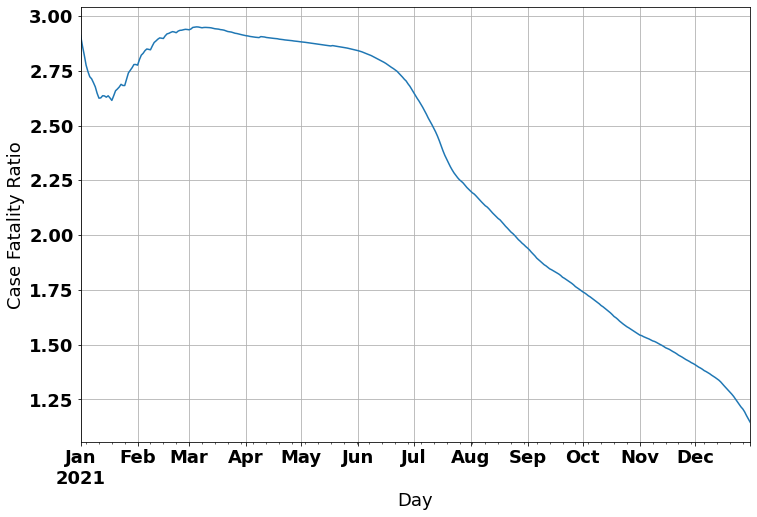

In [87]:
import matplotlib.pyplot as plt 
import matplotlib
font = {'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

plt.figure(figsize=(12,8))
DF_Uk_u=DF_Uk1.copy()
DF_Uk_u.index=DF_Uk_u.Day
#plt.plot(DF_Uk_u.index, DF_Uk_u['Case_Fatality_Ratio'],'bs')
DF_Uk_u['Case_Fatality_Ratio'].plot()
plt.ylabel('Case Fatality Ratio')
plt.grid()
plt.savefig('/home/sharedVol/Case_Fatality_Ratio.png')

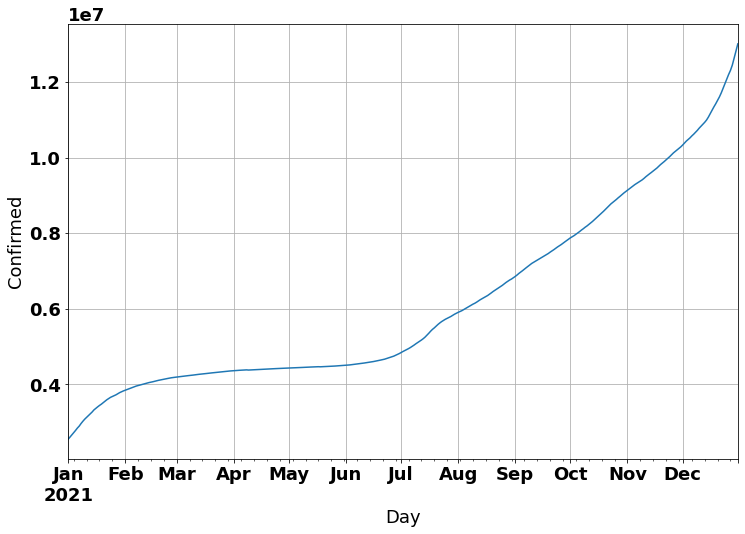

In [66]:
plt.figure(figsize=(12,8))
DF_Uk_u=DF_Uk1.copy()
DF_Uk_u.index=DF_Uk_u.Day
DF_Uk_u['Confirmed'].plot()
plt.ylabel('Confirmed')
plt.grid()

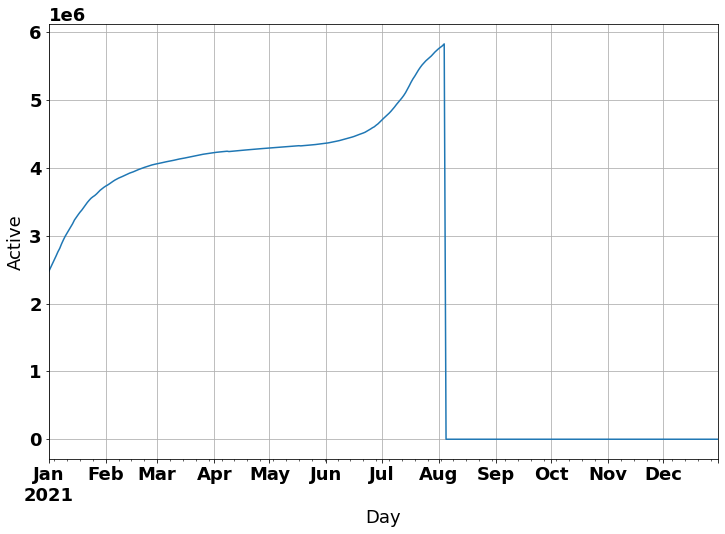

In [67]:
plt.figure(figsize=(12,8))
DF_Uk_u=DF_Uk1.copy()
DF_Uk_u.index=DF_Uk_u.Day
DF_Uk_u['Active'].plot()
plt.ylabel('Active')
plt.grid()

In [68]:
Selec_Columns=['Confirmed','Deaths', 'Recovered', 'Active', 'Incident_Rate','Case_Fatality_Ratio']
DF_Uk_u_2=DF_Uk_u[Selec_Columns]

DF_Uk_u_2

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()


DF_Uk_u_3 = pd.DataFrame(min_max_scaler.fit_transform(DF_Uk_u_2[Selec_Columns]),columns=Selec_Columns)
DF_Uk_u_3.index=DF_Uk_u_2.index
DF_Uk_u_3['Day']=DF_Uk_u.Day
DF_Uk_u_3.head(3)

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,Day
Day,,,,,,,
2021-01-01,0.000000,0.000000,0.230106,0.423930,0.000000,0.978543,2021-01-01
2021-01-02,0.005533,0.005971,0.232738,0.433773,0.005533,0.952227,2021-01-02
2021-01-03,0.010801,0.012049,0.246912,0.443103,0.010801,0.928841,2021-01-03


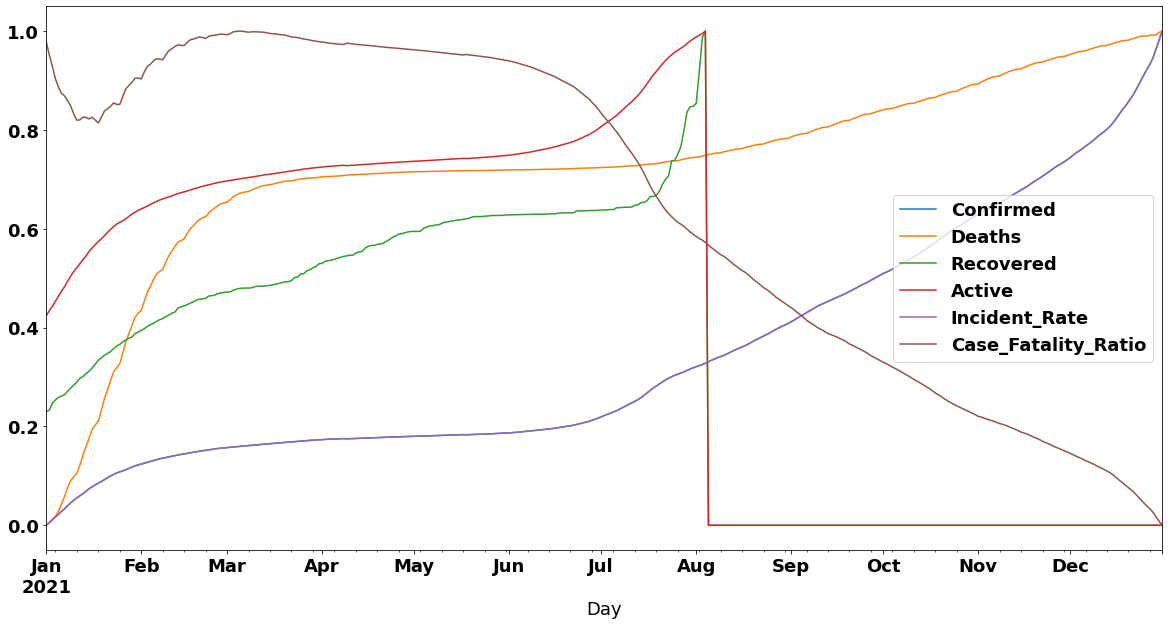

In [70]:
DF_Uk_u_3[Selec_Columns].plot(figsize=(20,10))
plt.savefig('/home/sharedVol/Uk_scoring_report.png')

In [71]:
DF_Uk_u_3.to_csv('/home/sharedVol/Uk_scoring_report.csv')
DF_Uk_u_2.to_csv('/home/sharedVol/Uk_scoring_report_NotScaled.csv')

In [77]:
from sqlalchemy import inspect,create_engine
import psycopg2

host="postgres_storage"
database="csv_db"
user="psut"
password="psut2022"
port='5432'
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
insp = inspect(engine)
print(insp.get_table_names())

['users', 'Uk_scoring_report_08_06_2022', 'Uk_scoring_notscaled_report_08_06_2022']


In [81]:
from datetime import date

today = date.today()
Day=today.strftime("%d_%m_%Y")
DF_Uk_u_3.to_sql(f'uk_scoring_report_{Day}', engine,if_exists='replace',index=False)
DF_Uk_u_2.to_sql(f'uk_scoring_notscaled_report_{Day}', engine,if_exists='replace',index=False)

365

In [83]:
insp = inspect(engine)
print(insp.get_table_names())

['users', 'uk_scoring_report_08_06_2022', 'uk_scoring_notscaled_report_08_06_2022']


In [85]:
scores_extracted=pd.read_sql(f"SELECT * FROM uk_scoring_report_{Day}" , engine);
scores_not_scaled_extracted=pd.read_sql(f"SELECT * FROM uk_scoring_notscaled_report_{Day}" , engine);
scores_extracted.head(3)

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,Day
0,0.000000,0.000000,0.230106,0.423930,0.000000,0.978543,2021-01-01
1,0.005533,0.005971,0.232738,0.433773,0.005533,0.952227,2021-01-02
2,0.010801,0.012049,0.246912,0.443103,0.010801,0.928841,2021-01-03


In [86]:
scores_not_scaled_extracted.head(3)

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,2549671,74235,5682.0,2469774.0,25.49671,2.911552
1,2607548,74682,5747.0,2527117.0,26.07548,2.864070
2,2662664,75137,6097.0,2581469.0,26.62664,2.821873
